# **Pemodelan Data Produksi Padi dengan Algoritma K-Means: Studi Kasus 2018–2024**


Nama    : Muhammad Aulia Anhar

NIM     : A11.2022.14848

Klompok : A11.4519


## Deskripsi Dataset

Dataset ini berisi informasi terkait produksi padi dari tahun 2018 hingga 2024.
Setiap baris mewakili data dari suatu wilayah pada tahun tertentu.
Berikut adalah deskripsi kolom yang terdapat dalam dataset:
- **Tahun**: Tahun data diambil.
- **Wilayah**: Nama wilayah administratif.
- **Produksi (ton)**: Jumlah produksi padi dalam ton.
- **Luas Panen (ha)**: Luas panen dalam hektar.
- **Produktivitas (ton/ha)**: Produktivitas dihitung berdasarkan rasio produksi terhadap luas panen.

Tujuan analisis adalah mengelompokkan wilayah berdasarkan pola produksi padi untuk membantu pengambilan keputusan dalam pengelolaan sumber daya pertanian.


## **1. Ringkasan dan Permasalahan Proyek**

Produksi padi merupakan salah satu sektor penting dalam pertanian Indonesia. Diperlukan analisis data yang komprehensif untuk mengelompokkan pola produksi pada berbagai wilayah. Hal ini bertujuan untuk membantu perencanaan dan pengambilan kebijakan yang lebih baik.

Permasalahan yang ingin di capai yaitu:
1. Bagaimana pola produksi padi di berbagai wilayah di Indonesia pada tahun 2018–2024 dapat dikelompokkan menggunakan algoritma clustering?
2. Apakah pola ini dapat memberikan wawasan strategis bagi pengelolaan sumber daya pertanian?

Tujuan tujuan dari klaster dan analisa:
1. Mengidentifikasi pola produksi padi di Indonesia.
2. Mengelompokkan wilayah berdasarkan karakteristik produksinya.
3. Memberikan wawasan berbasis data untuk mendukung perencanaan pertanian.

Model/Alur Penyelesaian:







# **2. Penjelasan Dataset, EDA, dan Proses Features Dataset**

### **A.  Penjelasan Dataset:**
Keterangan Data :

1. Luas panen dan produksi padi tahun 2018-2024 dari bulan Oktober-Desember adalah angka potensi
2. Kualitas produksi adalah Gabah Kering Giling (GKG)
3. Data pokok tanaman pangan yang dikumpulkan oleh Badan Pusat Statistik adalah luas panen dan produktivitas (hasil per hektar). Produksi merupakan hasil perkalian antara luas panen dan produktivitas.
4. Data luas panen padi mulai tahun 2018 dihitung dengan metode Kerangka Sampel Area (KSA), menggantikan metode pengumpulan data luas panen padi yang sebelumnya yaitu metode eye estimate yang dikumpulkan melalui pelaporan data Statistik Pertanian (SP) oleh Kepala Cabang Dinas (KCD) Kecamatan.
5. Angka produktivitas padi diperoleh melalui survei ubinan pada plot berukuran 2,5 m x 2,5 m dalam bentuk produksi Gabah Kering Panen (GKP) yang dikonversikan menjadi Gabah Kering Giling (GKG) berdasarkan angka konversi GKP ke GKG hasil Survei Konversi Gabah ke Beras tahun 2018.

Dataset ini  memuat informasi produksi padi dari tahun 2018 hingga 2024 di berbagai wilayah Indonesia. Data mencakup Atribut:
Tahun produksi
Wilayah produksi
Hasil produksi (ton)
Faktor pendukung seperti luas panen (hektar) dan produktivitas (ton/hektar)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Input Data dan Library**

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [3]:
file_path = '/content/drive/MyDrive/Semester 5/Data mining/UAS/Produktivitas Padi 2018-2024.xlsx'
df = pd.ExcelFile(file_path)


In [4]:
# Baca sheet pertama dari file Excel
data = df.parse(df.sheet_names[0])

# Sekarang 'data' adalah DataFrame,
print(data.head())


      38 Provinsi    HA 2018    HA 2019    HA 2020    HA 2021    HA 2022  \
0            ACEH  329515.78  310012.46  317869.41  297058.38  271750.20   
1  SUMATERA UTARA  408176.45  413141.24  388591.22  385405.00  411462.10   
2  SUMATERA BARAT  313050.82  311671.23  295664.47  272391.95  271883.10   
3            RIAU   71448.08   63142.04   64733.13   53062.35   51054.04   
4           JAMBI   86202.68   69536.06   84772.93   64412.26   60539.59   

     HA 2023    HA 2024  KU/HA 2018  KU/HA 2019  ...  KU/HA 2022  KU/HA 2023  \
0  254287.38  301081.97       56.49       55.30  ...       55.55       55.22   
1  406109.49  419089.12       51.65       50.32  ...       50.76        51.4   
2  300564.77  296215.93       47.37       47.58  ...       50.52       49.32   
3   51914.14   57003.35       37.28       36.56  ...       41.83       39.68   
4   61236.64   64119.24       44.44       44.57  ...       45.88       45.06   

   KU/HA 2024    TON 2018    TON 2019    TON 2020    TON 2021 

In [5]:
#.info(), dan .describe()
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   38 Provinsi  38 non-null     object 
 1   HA 2018      34 non-null     object 
 2   HA 2019      34 non-null     float64
 3   HA 2020      34 non-null     object 
 4   HA 2021      34 non-null     float64
 5   HA 2022      34 non-null     float64
 6   HA 2023      38 non-null     object 
 7   HA 2024      38 non-null     float64
 8   KU/HA 2018   34 non-null     float64
 9   KU/HA 2019   34 non-null     float64
 10  KU/HA 2020   34 non-null     float64
 11  KU/HA 2021   34 non-null     float64
 12  KU/HA 2022   34 non-null     float64
 13  KU/HA 2023   38 non-null     object 
 14  KU/HA 2024   38 non-null     float64
 15  TON 2018     34 non-null     float64
 16  TON 2019     34 non-null     float64
 17  TON 2020     34 non-null     float64
 18  TON 2021     34 non-null     float64
 19  TON 2022  


# **B. Exploratory Data Analysis (EDA):**

1. Pengecekan nilai null atau data yang hilang.
2. Distribusi data untuk setiap fitur, termasuk outlier.
3. Korelasi antar fitur untuk menentukan hubungan yang signifikan.

In [6]:
#Eksplorasi Data (EDA)
# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   38 Provinsi  38 non-null     object 
 1   HA 2018      34 non-null     object 
 2   HA 2019      34 non-null     float64
 3   HA 2020      34 non-null     object 
 4   HA 2021      34 non-null     float64
 5   HA 2022      34 non-null     float64
 6   HA 2023      38 non-null     object 
 7   HA 2024      38 non-null     float64
 8   KU/HA 2018   34 non-null     float64
 9   KU/HA 2019   34 non-null     float64
 10  KU/HA 2020   34 non-null     float64
 11  KU/HA 2021   34 non-null     float64
 12  KU/HA 2022   34 non-null     float64
 13  KU/HA 2023   38 non-null     object 
 14  KU/HA 2024   38 non-null     float64
 15  TON 2018     34 non-null     float64
 16  TON 2019     34 non-null     float64
 17  TON 2020     34 non-null     float64
 18  TON 2021     34 non-null     floa

In [7]:
# Memeriksa nilai yang hilang
print("\nNilai yang Hilang:")
print(data.isnull().sum())


Nilai yang Hilang:
38 Provinsi    0
HA 2018        4
HA 2019        4
HA 2020        4
HA 2021        4
HA 2022        4
HA 2023        0
HA 2024        0
KU/HA 2018     4
KU/HA 2019     4
KU/HA 2020     4
KU/HA 2021     4
KU/HA 2022     4
KU/HA 2023     0
KU/HA 2024     0
TON 2018       4
TON 2019       4
TON 2020       4
TON 2021       4
TON 2022       4
TON 2023       0
TON 2024       0
dtype: int64


In [8]:
# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())



Statistik Deskriptif:
            HA 2019       HA 2021       HA 2022       HA 2024  KU/HA 2018  \
count  3.400000e+01  3.400000e+01  3.400000e+01  3.800000e+01   34.000000   
mean   3.140555e+05  3.062294e+05  3.074315e+05  2.643805e+05   45.422353   
std    4.701667e+05  4.775165e+05  4.807493e+05  4.275318e+05   10.195318   
min    3.562700e+02  2.701600e+02  1.794800e+02  2.668000e+01   26.530000   
25%    5.610389e+04  5.372293e+04  5.006994e+04  2.031937e+04   39.575000   
50%    1.219106e+05  1.166881e+05  1.116239e+05  8.082736e+04   46.260000   
75%    3.112565e+05  2.918468e+05  2.718499e+05  2.921686e+05   51.232500   
max    1.702426e+06  1.747481e+06  1.693211e+06  1.616235e+06   72.760000   

       KU/HA 2019  KU/HA 2020  KU/HA 2021  KU/HA 2022  KU/HA 2024  \
count   34.000000   34.000000   34.000000   34.000000   38.000000   
mean    44.269118   44.008824   45.941471   45.820882   44.169737   
std      8.730935    8.716140    8.173837    8.349779    9.321203   
min    

# **Pembersihan Data**

1.  Membersihkan dan mengonversi tipe data dalam kolom
2.   Item daftar



In [9]:
# Tampilkan nilai unik dari kolom bertipe object (kecuali kolom '38 Provinsi')
for column in data.columns:
    if data[column].dtype == 'object' and column != '38 Provinsi':
        print(f"Nilai unik pada kolom {column}:")
        print(data[column].unique())

# Membersihkan dan mengonversi tipe data kolom menjadi float64
for column in data.columns:
    if data[column].dtype == 'object' and column != '38 Provinsi':
        # Ganti nilai tidak valid menjadi NaN
        data[column] = pd.to_numeric(data[column], errors='coerce')

# Konfirmasi ulang tipe data setelah konversi
print("\nTipe data setelah konversi:")
print(data.dtypes)

Nilai unik pada kolom HA 2018:
['329515.78' '408176.45' '313050.82' '71448.08' '86202.68' '581574.61'
 '65891.16' '511940.93' '17233.59' '375.87' '673.37' '1707253.81'
 '1821983.17' '93956.45' '1751191.67' '344836.06' '110978.37' '289242.59'
 '218232.91' '286476.03' '147571.69' '323091.21' '64961.16' 13707
 '70352.62' '201279.24' '1185484.1' '136673.75' '56631.64' '65303.78'
 '29052.14' '13412.75' datetime.datetime(7767, 1, 1, 0, 0) nan '52411.95']
Nilai unik pada kolom HA 2020:
['317869.41' '388591.22' '295664.47' '64733.13' '84772.93' '551320.76'
 '64137.28' '545149.05' '17840.55' '298.52' '914.51' '1586888.63'
 '1666931.49' '110548.12' '1754380.3' '325333.24' '90980.69' '273460.82'
 '181690.63' '256575.43' '143275.05' '289836.35' '73568.44'
 datetime.datetime(9883, 5, 1, 0, 0) '61827.86' '178066.94' '976258.14'
 '133697.15' '48686.34' '64826.18' '28668.22' '10301.91' '7570.63' nan
 '52727.52']
Nilai unik pada kolom HA 2023:
['254287.38' '406109.49' '300564.77' '51914.14' '61236.64' 

In [10]:
# Mengatasi nilai yang hilang dengan mengisi kolom kosong menggunakan nilai rata-rata
for column in data.columns:
    if data[column].dtype in [np.float64, np.int64]:
        data[column] = data[column].fillna(data[column].mean())

# Menampilkan informasi dasar tentang dataset yang telah diisi nilai kosong
print("\nInformasi Dataset setelah Pembersihan:")
print(data.info())


Informasi Dataset setelah Pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   38 Provinsi  38 non-null     object 
 1   HA 2018      38 non-null     float64
 2   HA 2019      38 non-null     float64
 3   HA 2020      38 non-null     float64
 4   HA 2021      38 non-null     float64
 5   HA 2022      38 non-null     float64
 6   HA 2023      38 non-null     float64
 7   HA 2024      38 non-null     float64
 8   KU/HA 2018   38 non-null     float64
 9   KU/HA 2019   38 non-null     float64
 10  KU/HA 2020   38 non-null     float64
 11  KU/HA 2021   38 non-null     float64
 12  KU/HA 2022   38 non-null     float64
 13  KU/HA 2023   38 non-null     float64
 14  KU/HA 2024   38 non-null     float64
 15  TON 2018     38 non-null     float64
 16  TON 2019     38 non-null     float64
 17  TON 2020     38 non-null     float64
 18  TON 2021    

In [11]:
# Memeriksa kembali apakah masih ada nilai yang hilang
print("\nNilai yang Hilang setelah Pembersihan:")
print(data.isnull().sum())



Nilai yang Hilang setelah Pembersihan:
38 Provinsi    0
HA 2018        0
HA 2019        0
HA 2020        0
HA 2021        0
HA 2022        0
HA 2023        0
HA 2024        0
KU/HA 2018     0
KU/HA 2019     0
KU/HA 2020     0
KU/HA 2021     0
KU/HA 2022     0
KU/HA 2023     0
KU/HA 2024     0
TON 2018       0
TON 2019       0
TON 2020       0
TON 2021       0
TON 2022       0
TON 2023       0
TON 2024       0
dtype: int64


In [12]:
# Menampilkan statistik deskriptif setelah pembersihan
print("\nStatistik Deskriptif setelah Pembersihan:")
print(data.describe())


Statistik Deskriptif setelah Pembersihan:
            HA 2018       HA 2019       HA 2020       HA 2021       HA 2022  \
count  3.800000e+01  3.800000e+01  3.800000e+01  3.800000e+01  3.800000e+01   
mean   3.445505e+05  3.140555e+05  3.226482e+05  3.062294e+05  3.074315e+05   
std    4.747356e+05  4.440255e+05  4.448659e+05  4.509668e+05  4.540198e+05   
min    3.758700e+02  3.562700e+02  2.985200e+02  2.701600e+02  1.794800e+02   
25%    6.545062e+04  6.216066e+04  6.428624e+04  5.657415e+04  5.257849e+04   
50%    2.097561e+05  1.661225e+05  1.798788e+05  1.512087e+05  1.436260e+05   
75%    3.445505e+05  3.140555e+05  3.226482e+05  3.062294e+05  3.074315e+05   
max    1.821983e+06  1.702426e+06  1.754380e+06  1.747481e+06  1.693211e+06   

            HA 2023       HA 2024  KU/HA 2018  KU/HA 2019  KU/HA 2020  ...  \
count  3.800000e+01  3.800000e+01   38.000000   38.000000   38.000000  ...   
mean   2.834417e+05  2.643805e+05   45.422353   44.269118   44.008824  ...   
std    4.47

## **C. Proses Features:**

1. Normalisasi data agar fitur memiliki skala yang sebanding.

2. Seleksi fitur berdasarkan relevansi dengan analisis clustering (misalnya, hasil produksi dan produktivitas).

In [13]:
# Pemilihan dan Penambahan Fitur Baru
# Menambahkan fitur baru
data['Rasio_Produksi_LuasPanen'] = data['TON 2018'] / data['HA 2018']  # Contoh perhitungan rasio
data['Tren_Produktivitas'] = data['KU/HA 2024'] - data['KU/HA 2018']   # Perubahan produktivitas

# Memilih fitur yang relevan untuk clustering
fitur_terpilih = ['TON 2018', 'HA 2018', 'KU/HA 2018',
                  'Rasio_Produksi_LuasPanen', 'Tren_Produktivitas']
data_fitur = data[fitur_terpilih]

In [14]:
# Langkah 5: Normalisasi Data
from sklearn.preprocessing import StandardScaler #Import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
data_normalisasi = scaler.fit_transform(data_fitur)

In [15]:
# Menampilkan informasi dasar tentang data yang telah dinormalisasi
print("\nInformasi Data Normalisasi:")
print(pd.DataFrame(data_normalisasi, columns=fitur_terpilih).describe())


Informasi Data Normalisasi:
           TON 2018       HA 2018    KU/HA 2018  Rasio_Produksi_LuasPanen  \
count  3.800000e+01  3.800000e+01  3.800000e+01              3.800000e+01   
mean  -6.135443e-17  2.328991e-16 -1.344564e-15              1.411152e-15   
std    1.013423e+00  1.013423e+00  1.013423e+00              1.013423e+00   
min   -6.455772e-01 -7.347136e-01 -1.988475e+00             -3.741468e+00   
25%   -5.468651e-01 -5.957977e-01 -5.580880e-01             -4.225521e-01   
50%   -3.738949e-01 -2.877473e-01 -7.478668e-16              1.981383e-01   
75%    0.000000e+00  2.485131e-16  5.260168e-01              4.551044e-01   
max    3.249375e+00  3.153892e+00  2.877367e+00              2.327185e+00   

       Tren_Produktivitas  
count        3.800000e+01  
mean        -2.556435e-17  
std          1.013423e+00  
min         -5.528986e+00  
25%         -3.873821e-02  
50%          1.518412e-01  
75%          3.190247e-01  
max          1.401087e+00  


# ** Finalisasi Input untuk Clustering**
### Menentukan jumlah cluster optimal menggunakan Metode Elbow

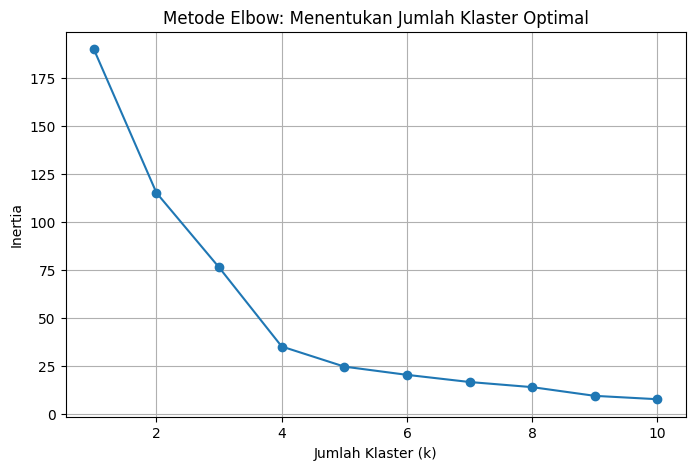

In [17]:

# Metode Elbow untuk Menentukan Jumlah Klaster Optimal
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalisasi)
    inertia.append(kmeans.inertia_)

# Visualisasi Metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Metode Elbow: Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


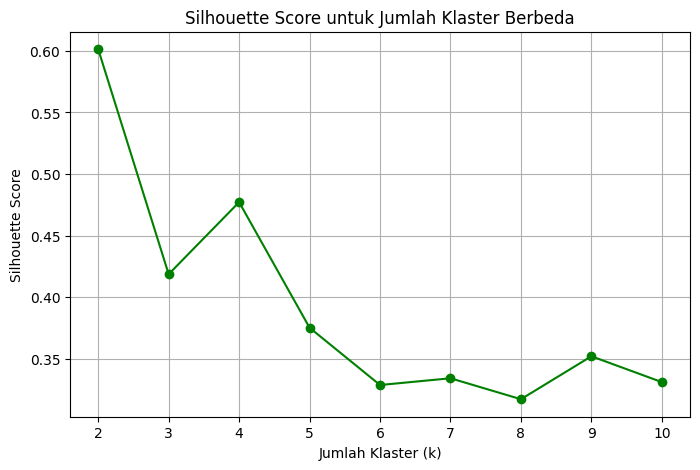

In [20]:
# Evaluasi Silhouette Score untuk K yang Berbeda
from sklearn.metrics import silhouette_score

silhouette_scores = [] # Initialize as an empty list
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_normalisasi)
    score = silhouette_score(data_normalisasi, labels)
    silhouette_scores.append(score)

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score untuk Jumlah Klaster Berbeda')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


## **3. Proses Learning/Modeling**
Model yang Digunakan:
- Algoritma: K-Means Clustering

**Langkah Modeling:**

a. Menentukan jumlah cluster optimal menggunakan metode Elbow.

b. Melatih model dengan data yang telah diproses.

c. Menyimpan hasil klaster untuk interpretasi.


**Evaluasi Model:**

Metode evaluasi: Silhouette Score untuk mengevaluasi seberapa baik setiap data berada dalam cluster yang benar.

# V1 K-Means

In [ ]:
# Menerapkan Clustering K-Means
jumlah_cluster_optimal = 4  # jumlah optimal dari plot Elbow
kmeans = KMeans(n_clusters=jumlah_cluster_optimal, random_state=42)
kmeans_labels = kmeans.fit_predict(data_normalisasi)

# Menambahkan label cluster ke dataset asli
data['Cluster'] = kmeans_labels

# Langkah 8: Evaluasi Clustering
silhouette = silhouette_score(data_normalisasi, kmeans_labels)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.4771971427497401


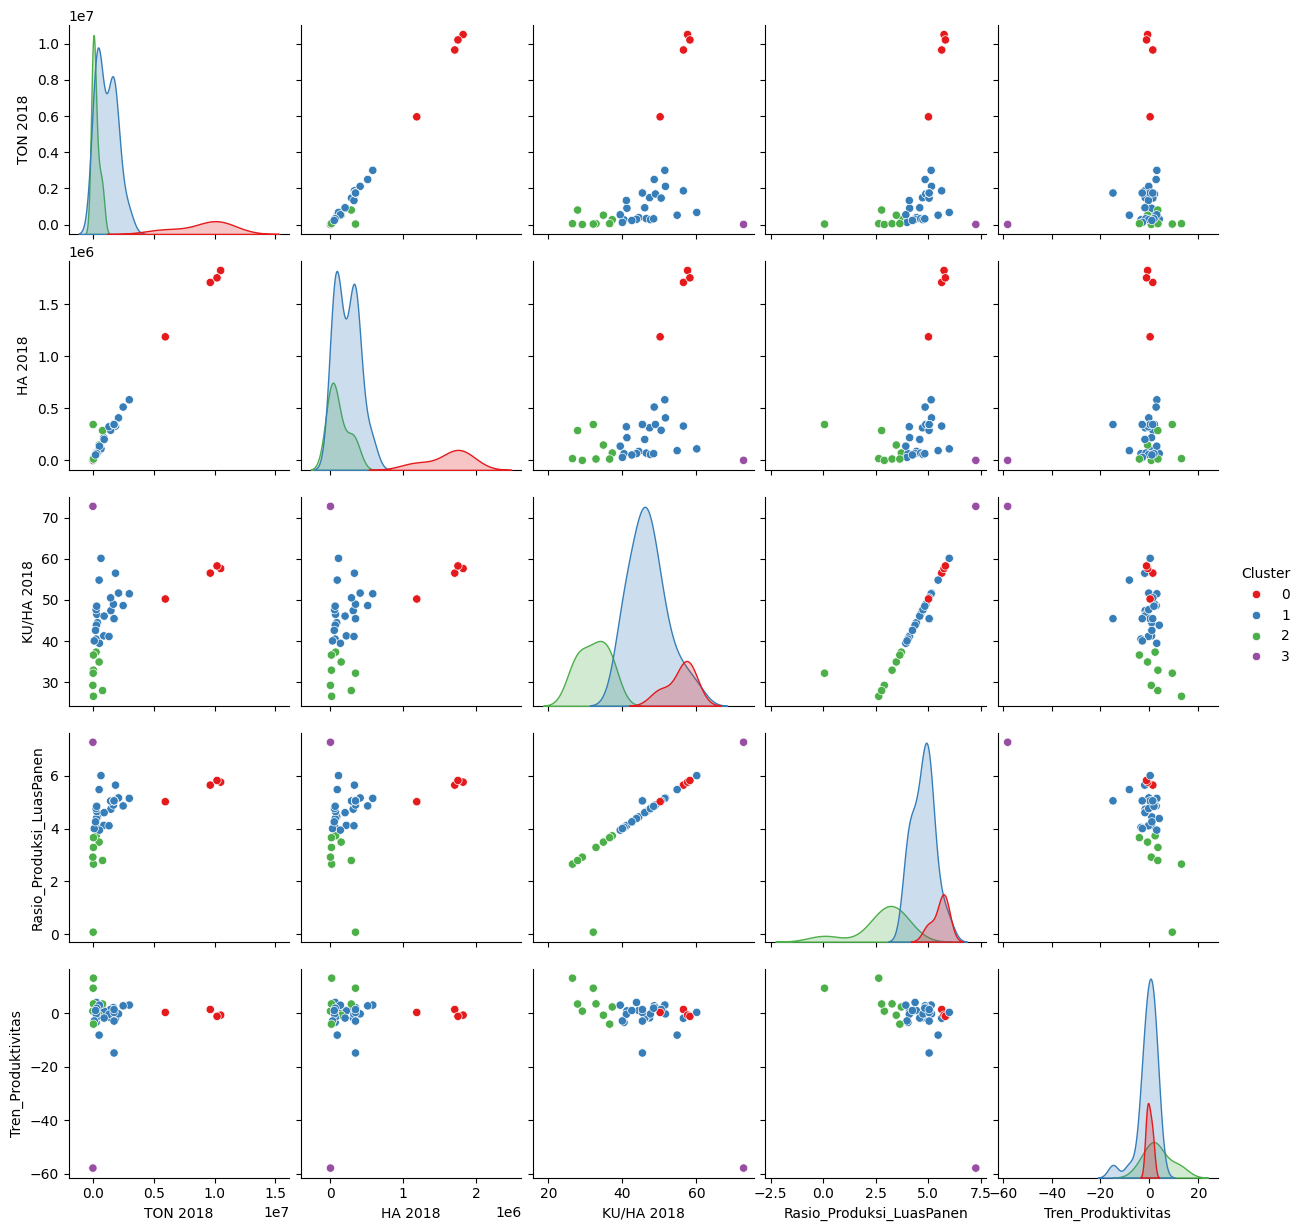

In [ ]:
# Visualisasi Hasil Clustering
# Contoh: Visualisasi dengan pairplot
sns.pairplot(data, vars=fitur_terpilih, hue='Cluster', palette='Set1')
plt.show()

# V2 K-Means


Reduksi dimensi menggunakan PCA membantu menyederhanakan data tanpa kehilangan banyak informasi penting. kemudian clustering dilakukan pada data yang direduksi, dan evaluasi dilakukan menggunakan Silhouette Score untuk menentukan kualitas pembagian cluster.








In [ ]:
from sklearn.decomposition import PCA

# Reduksi 3D
pca = PCA(n_components=3)  # visualisasi 3D
data_pca = pca.fit_transform(data_normalisasi)

# Clustering dengan PCA
kmeans_5_pca = KMeans(n_clusters=4, random_state=42)
kmeans_labels_5_pca = kmeans_5_pca.fit_predict(data_pca)

# Evaluasi
silhouette_5_pca = silhouette_score(data_pca, kmeans_labels_5_pca)
print(f"Silhouette Score untuk 4 Cluster (dengan PCA): {silhouette_5_pca}")


Silhouette Score untuk 4 Cluster (dengan PCA): 0.4873399741241256


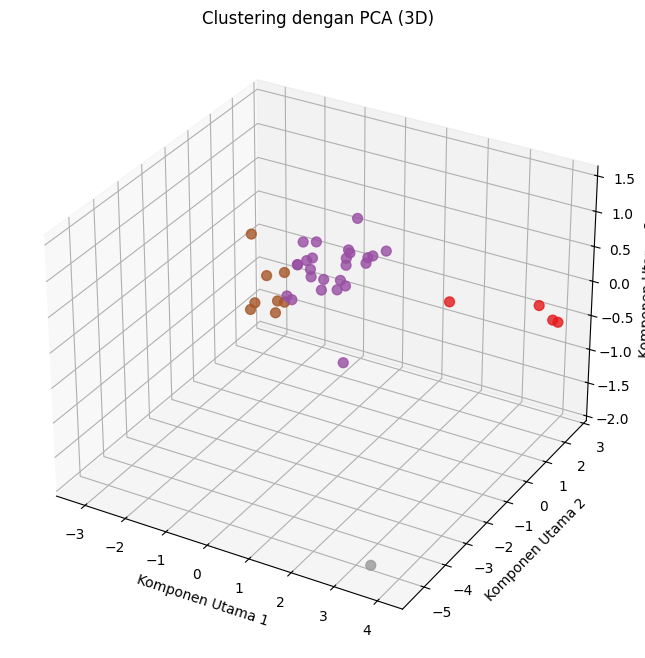

In [ ]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
scatter = ax.scatter(
    data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],  # Menggunakan data_pca
    c=kmeans_labels_5_pca, cmap='Set1', s=50, alpha=0.8
)

ax.set_title("Clustering dengan PCA (3D)")
ax.set_xlabel("Komponen Utama 1")
ax.set_ylabel("Komponen Utama 2")
ax.set_zlabel("Komponen Utama 3")

# Tampilkan plot
plt.show()

#V3 K-Means

Kode ini adalah implementasi K-Means Clustering dengan parameter yang telah dikustomisasi untuk mengoptimalkan hasil clustering. Berikut penjelasannya:

In [ ]:
kmeans_5_custom = KMeans(
    n_clusters=4,
    init='k-means++',  # Inisialisasi centroid default yang lebih baik
    max_iter=500,      # Meningkatkan iterasi maksimal
    n_init=10,         # Ulang proses clustering 10 kali untuk hasil terbaik
    random_state=42
)
kmeans_labels_5_custom = kmeans_5_custom.fit_predict(data_normalisasi)

# Evaluasi
silhouette_5_custom = silhouette_score(data_normalisasi, kmeans_labels_5_custom)
print(f"Silhouette Score untuk  Cluster (dengan parameter custom): {silhouette_5_custom}")


Silhouette Score untuk  Cluster (dengan parameter custom): 0.4771971427497401


In [ ]:
# Langkah 10: Menyimpan Dataset yang Sudah Dikluster
output_path = '/content/drive/MyDrive/Semester 5/Data mining/UAS/Data setelah di cluster/Clustered_Produktivitas_Padi.xlsx'
data.to_excel(output_path, index=False)
print(f"Data yang telah dikluster disimpan di {output_path}")


Data yang telah dikluster disimpan di /content/drive/MyDrive/Semester 5/Data mining/UAS/Data setelah di cluster/Clustered_Produktivitas_Padi.xlsx


# **4. Performa Model**

Hasil Evaluasi:

Jumlah cluster optimal: 4 (contoh dari analisis Elbow Method).

setelah melakukan 3 percoban:



Silhouette Score:Belum mendapat menunjukkan kualitas cluster yang baik. (masih dalam tahap mencari sampai mendapt hasil maksimal)

Distribusi data dalam cluster:


1. Menerapkan algoritma K-Means untuk membagi data ke dalam 4 cluster, mendapatkan Silhouette Score: 0.477

2. Reduksi dimensi menggunakan PCA kemudian Menerapkan algoritma K-Means untuk membagi data ke dalam 4 cluster, mendapatkan Silhouette Score: 0.4873399741241256

3. Kode ini menggunakan parameter yang dikustomisasi untuk mengoptimalkan algoritma K-Means. mendapatkan Silhouette Score : 0.4771971427497401


##Interpretasi Hasil Klasterisasi
Setelah menentukan jumlah klaster optimal, hasil klasterisasi dianalisis sebagai berikut:

- Klaster 1: Wilayah dengan produksi padi tinggi, luas panen besar, dan produktivitas tinggi.
- Klaster 2: Wilayah dengan produksi sedang, luas panen sedang, namun produktivitas rendah.
- Klaster 3: Wilayah dengan produksi rendah, luas panen kecil, namun produktivitas tinggi.
- Klaster 4: Wilayah dengan produksi rendah, luas panen kecil, dan produktivitas rendah.

Interpretasi ini dapat digunakan untuk menyusun strategi peningkatan produksi padi, seperti:

- Mengarahkan sumber daya ke wilayah dengan produktivitas rendah untuk meningkatkan efisiensi.
- Mempertahankan wilayah dengan produktivitas tinggi agar tetap konsisten.






## **5. Diskusi Hasil dan Kesimpulan**

#Diskusi Hasil
Pemilihan Jumlah Klaster Optimal:

1. Berdasarkan analisis menggunakan Elbow Method, jumlah klaster optimal ditemukan pada titik di mana penurunan inertia mulai melambat. Hasil ini didukung oleh analisis Silhouette Score yang menunjukkan bahwa nilai tertinggi diperoleh pada jumlah klaster tertentu, menunjukkan kualitas klasterisasi yang baik.

2. Jumlah klaster optimal memberikan pemisahan yang efektif antara wilayah dengan pola produksi padi yang berbeda.

Karakteristik Klaster:

1. Hasil klasterisasi menunjukkan bahwa wilayah dapat dikelompokkan menjadi beberapa kategori berdasarkan produksi padi, luas panen, dan produktivitas.

2.  Setiap klaster memiliki ciri khas:
Klaster 1: Wilayah dengan produktivitas tinggi dan stabilitas hasil panen yang baik.
Klaster 2: Wilayah dengan luas panen besar tetapi produktivitas relatif lebih rendah.
Klaster 3: Wilayah dengan produktivitas rendah tetapi menunjukkan potensi peningkatan dengan intervensi.
Klaster 4: Wilayah dengan produksi padi dan luas panen yang rendah, menunjukkan keterbatasan dalam sumber daya atau kondisi lingkungan.

Evaluasi Model:

1. Silhouette Score memberikan indikasi bahwa klaster yang dihasilkan cukup baik dalam memisahkan data antar-klaster sekaligus mempertahankan kekompakan dalam klaster yang sama.
2. Model K-Means memberikan hasil yang stabil karena proses inisialisasi centroid yang baik dengan metode k-means++.

Potensi Penggunaan Data:

1. Hasil klasterisasi dapat digunakan untuk menentukan prioritas alokasi sumber daya seperti pupuk, irigasi, atau program peningkatan produktivitas pertanian.

2. Pemerintah atau organisasi terkait dapat menggunakan hasil analisis untuk menyusun kebijakan berbasis data dalam meningkatkan produksi padi nasional.

# Kesimpulan
1. Klasterisasi menggunakan algoritma K-Means berhasil mengelompokkan wilayah berdasarkan pola produksi padi dengan efektif.
2. Evaluasi menggunakan Silhouette Score menunjukkan bahwa jumlah klaster yang dipilih memberikan kualitas klasterisasi yang baik, meskipun hasilnya masih dapat ditingkatkan dengan pengayaan data atau metode klasterisasi lainnya.
3. Karakteristik klaster memberikan wawasan berharga terkait wilayah mana yang perlu mendapatkan perhatian lebih, baik untuk peningkatan produktivitas maupun alokasi sumber daya.
4. Dengan menggunakan analisis ini, diharapkan program-program peningkatan hasil panen padi dapat dirancang secara lebih terarah dan efisien.